# Subject: Data Science Foundation

## Session 14 - ArcGIS API for Python.

### Demo 4 -  Publishing Shapefiles, CSVs, SD (Sample Data) and text files (JSON)

## Publish a feature service from a shapefile and update the item information

To publish a shapefile, we first add the zipped shapefile to the Portal as an item, then call publish() method on the item to create a web layer. Often times, your shape files or service definitions may not contain the metadata you want to show on the portal item. This sample demonstrates how you can update those properties after publishing a web layer.

In [1]:
from IPython.display import display
from arcgis.gis import GIS
import os
gis = GIS("https://www.arcgis.com", "FSGutierres_BTS", "Liberdade_3030")

In [2]:
data = "C:/Users/francisco.sacramento/Desktop/Master_Big_Data_Phyton/6_Exercices/Data Science Foundations\Session_14_DSF/CLC12_Barcelona.zip"
shpfile = gis.content.add({}, data)

Item 'CLC12_Barcelona.zip' already exists.


RuntimeError: Item 'CLC12_Barcelona.zip' already exists.
(Error Code: 409)

In [ ]:
shpfile

In [ ]:
published_service = shpfile.publish()

In [ ]:
display(published_service)

In [ ]:
fSGutierres_BTS_content = gis.content.search("CLC12_Barcelona ", item_type="Feature Layer", max_items=5)

In [ ]:
fSGutierres_BTS_content

In [3]:
# Create a map widget
map1 = gis.map('Barcelona') # Passing a place name to the constructor
                        # will initialize the extent of the map.
map1

In [4]:
#get the first item
CLC12_Barcelona = fSGutierres_BTS_content[0]

NameError: name 'fSGutierres_BTS_content' is not defined

In [5]:
#add to map
map1.add_layer(CLC12_Barcelona)

NameError: name 'CLC12_Barcelona' is not defined

## Publish a CSV file 

To publish a CSV file, we first add the .csv file to the Portal, and then call the publish() method to publish it as a layer. 

In [6]:
csv_file = 'C:/Users/francisco.sacramento/Desktop/Master_Big_Data_Phyton/6_Exercices/Data Science Foundations\Session_14_DSF/Hotels_WGS84_v2.csv'
csv_item = gis.content.add({}, csv_file)

Item 'Hotels_WGS84_v2.csv' already exists.


RuntimeError: Item 'Hotels_WGS84_v2.csv' already exists.
(Error Code: 409)

The csv file used in this sample has a column titled LOCATION containing place names in text. During the publishing process we specify this column as an address_fields parameter. The server geocodes these locations to create point features for the web layer.

In [ ]:
csv_lyr = csv_item.publish(None, {"Address":"LOCATION"})

In [7]:
display(csv_lyr)

NameError: name 'csv_lyr' is not defined

In [8]:
fSGutierres_BTS_content = gis.content.search("Hotels_WGS84_v2", item_type="Feature Layer", max_items=5)

In [9]:
fSGutierres_BTS_content

[<Item title:"Hotels_WGS84_v2" type:Feature Layer Collection owner:FSGutierres_BTS>]

In [10]:
# Create a map widget
map2 = gis.map('Barcelona') # Passing a place name to the constructor
                        # will initialize the extent of the map.
map2

In [11]:
#get the first item
Hotels_WGS84_v2 = fSGutierres_BTS_content[0]

In [12]:
#add to map
map2.add_layer(Hotels_WGS84_v2)

## Publish a SD and Text file 

In [13]:
from arcgis.gis import GIS
from IPython.display import display

gis = GIS("https://www.arcgis.com", "FSGutierres_BTS", "Liberdade_3030")

To run through the sample, we require some published web layers, web maps and web scene items. This section contains cells that show how to publish them. To understand the publishing process in detail, lets check ESRI samples.

In [14]:
sd_file = "C:/Users/francisco.sacramento/Desktop/Master_Big_Data_Phyton/6_Exercices/Data Science Foundations/Session_14_DSF/Ebola_Treatment_Units.sd"

# add the sd file as an item and publish it as a web layer
item = gis.content.add({},sd_file)
new_item = item.publish()

Item 'Ebola_Treatment_Units.sd' already exists.


RuntimeError: Item 'Ebola_Treatment_Units.sd' already exists.
(Error Code: 409)

Now that the web layers are published, run through this section to publish a web map. To understand how this part of the sample works, refer to the sample titled Publishing web maps and web scenes

In [ ]:
import json
web_map_json = str()

# read web map json from text file
with open("C:/Users/francisco.sacramento/Desktop/Master_Big_Data_Phyton/6_Exercices/Data Science Foundations/Session_14_DSF/web_map_Ebola.json","r") as file_handle:
    web_map_json = json.load(file_handle)

# publish a web map
web_map_item_properties = {'title':'Ebola treatment locations',
                          'type':'Web Map',
                          'snippet':'This map shows locations of Ebola treatment centers in Africa',
                          'tags':'ArcGIS Python API',
                          'text':json.dumps(web_map_json)}

web_map_item = gis.content.add(web_map_item_properties)

# Using and updating a web map

We will search for that web map, draw it and update it if necessary.

In [47]:
search_result = gis.content.search("title:Ebola treatment locations", item_type = "Web Map")
display(search_result)

[<Item title:"Ebola treatment locations" type:Web Map owner:FSGutierres_BTS>]

In [48]:
# display the first search result to confirm the item
web_map_item = search_result[0]
display(web_map_item)

<Item title:"Ebola treatment locations" type:Web Map owner:FSGutierres_BTS>

In [49]:
import arcgis

# create a web map object out of the item
web_map_obj = arcgis.mapping.WebMap(web_map_item)

# display the web map obj in an interactive widget
web_map_obj

# Fix errors in web map

The widget loads an empty web map with just a basemap. Let us investigate the contents of the web map to determine the issue. Let us start with operationalLayers dictionary which contains the list of layers and inspect each layer.

In [50]:
layer_list = web_map_obj['operationalLayers']
display(layer_list)

[{'id': 'layer1',
  'itemId': 'f53d5907296e43e28e8570a24b1d1d26',
  'layerType': 'ArcGISFeatureLayer',
  'opacity': 1,
  'title': 'Ebola_Treatment_Units - Ebola_Treatment_Units_Classed',
  'url': 'https://services.arcgis.com/ORGID/arcgis/rest/services/Ebola_Facilities/FeatureServer/1',
  'visibility': True}]

The web map has only 1 layer and that points to a feature service title Ebola_Facilities. Let us verify if a feature service of that name exists on the server. If not, let us try to find the closest match.

In [51]:
search_result = gis.content.search('title:Ebola_Facilities', item_type = 'Feature Service')
display(search_result)

[]

Let us change the search query leaving just the word Ebola in the title.

<Item title:"Ebola_Treatment_Units" type:Feature Layer Collection owner:FSGutierres_BTS>
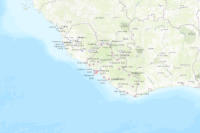

In [52]:
search_result = gis.content.search('title:Ebola', item_type='Feature Layer')
search_result[0]

It is likely the old service was deleted and a new one was with a different name was published. Let us update the web map dictionary with the correct url. But before that, we need to investigate if the new service also has layer with id 1 like the previous service.

In [53]:
ebola = search_result[0]
ebola.layers

[<FeatureLayer url:"https://services8.arcgis.com/SptQbDT6wWDmZ31Q/arcgis/rest/services/Ebola_Treatment_Units/FeatureServer/0">,
 <FeatureLayer url:"https://services8.arcgis.com/SptQbDT6wWDmZ31Q/arcgis/rest/services/Ebola_Treatment_Units/FeatureServer/1">]

The new feature service does have a layer with id 1. Hence we can use the same layer id while switching the url. While updating the web map, it is important to not only update the url but also the itemId of the feature service item.

In [54]:
# set the url to feature service item's url
layer_list[0]['url'] = ebola.layers[1].url
layer_list[0]['itemId'] = search_result[0].id

# update the web map object's operationalLayers dictionary
web_map_obj['operationalLayers'] = layer_list

# Update the web map

Now the web map should be fixed as it points to a live service. To update the web map, we call the update() method.

In [55]:
# Let us print the opertationalLayers dictionary before calling the update()
web_map_obj['operationalLayers']

[{'id': 'layer1',
  'itemId': 'cd39eb4ff4f44941a86df51b38ee5df3',
  'layerType': 'ArcGISFeatureLayer',
  'opacity': 1,
  'title': 'Ebola_Treatment_Units - Ebola_Treatment_Units_Classed',
  'url': 'https://services8.arcgis.com/SptQbDT6wWDmZ31Q/arcgis/rest/services/Ebola_Treatment_Units/FeatureServer/1',
  'visibility': True}]

In [58]:
web_map_obj.update()

Let us create a new web map object and try to draw it.

In [59]:
search_result = gis.content.search('title: Ebola_treatment_locations', item_type = "Web Map")
display(search_result)

[<Item title:"Ebola treatment locations" type:Web Map owner:FSGutierres_BTS>]

In [60]:
web_map_item = search_result[0]
web_map_obj = arcgis.mapping.WebMap(web_map_item)
web_map_obj

The web map was sucessfully overwritten with correct operational layers. You can interact with the widget and zoom into the African coast to observe the locations of Ebola treatment centers.

# Using a web scene

Let us look at the example of a web scene that displays tropical cyclones over the Pacific ocean.

<Item title:"Western Pacific Typhoons (2005)" type:Web Scene owner:esri_3d>
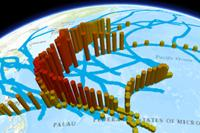

In [61]:
search_result = gis.content.search('title:Western Pacific Typhoons (2005) AND owner:esri_3d', 
                                   item_type = 'Web Scene', outside_org = True)
search_result[0]

Lets display the web scene in the notebook.

In [63]:
web_scene_item = search_result[0]
web_scene_obj = arcgis.mapping.WebScene(web_scene_item)

# display web scene in the notebook
web_scene_obj

WebScene([('operationalLayers',
           [{'id': '882ce65eceda4e2ba2ad65f9e2c0632f',
             'layerDefinition': {'drawingInfo': {'renderer': {'description': '',
                'label': '',
                'symbol': {'symbolLayers': [{'material': {'color': [0,
                     169,
                     230]},
                   'size': 5,
                   'type': 'Line'}],
                 'type': 'LineSymbol3D'},
                'type': 'simple'}},
              'elevationInfo': {'mode': 'onTheGround'},
              'maxScale': 0,
              'minScale': 120000000},
             'layerType': 'ArcGISFeatureLayer',
             'opacity': 1,
             'popupInfo': {'description': "<div><p><span style='font-weight:bold;'>Typhoon {name}</span></p><p><span style='font-weight:bold;'>Started: </span><span>{datedescription}</span></p></div>",
              'popupElements': [{'type': 'text'}],
              'showAttachments': False,
              'title': '{name}'},
             'title': 'Typhoon Paths',
             'url': 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/18',
             'visibility': True},
            {'id': '14a37c86f84-layer21',
             'layerType': 'GroupLayer',
             'layers': [{'id': '7a24e304d2474d7eb29a712c95202140',
               'layerDefinition': {'drawingInfo': {'renderer': {'description': '',
                  'label': '',
                  'symbol': {'name': 'Pushpin 1',
                   'styleName': 'EsriIconsStyle',
                   'type': 'styleSymbolReference'},
                  'type': 'simple',
                  'visualVariables': [{'axis': 'all',
                    'minSize': 25,
                    'type': 'sizeInfo',
                    'valueUnit': 'unknown'}]}},
                'elevationInfo': {'mode': 'absoluteHeight'}},
               'layerType': 'ArcGISFeatureLayer',
               'opacity': 1,
               'popupInfo': {'fieldInfos': [{'fieldName': 'typhoonid',
                  'label': 'typhoonid',
                  'visible': True},
                 {'fieldName': 'name', 'label': 'name', 'visible': True},
                 {'fieldName': 'datedescription',
                  'label': 'datedescription',
                  'visible': True},
                 {'fieldName': 'ORIG_FID',
                  'format': {'digitSeparator': True, 'places': 0},
                  'label': 'ORIG_FID',
                  'visible': True}],
                'popupElements': [{'type': 'fields'}, {'type': 'attachments'}],
                'showAttachments': True,
                'title': 'Labels Q4: {name}'},
               'showLabels': True,
               'title': 'Labels Q4',
               'url': 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/17',
               'visibility': False},
              {'id': '10944e27c9f04bc39b5821c0046523a5',
               'layerDefinition': {'drawingInfo': {'renderer': {'description': '',
                  'label': '',
                  'symbol': {'name': 'Standing Cylinder',
                   'styleName': 'EsriThematicShapesStyle',
                   'type': 'styleSymbolReference'},
                  'type': 'simple',
                  'visualVariables': [{'axis': 'height',
                    'field': 'windspeed',
                    'minDataValue': 0.0001,
                    'minSize': 1,
                    'type': 'sizeInfo'},
                   {'axis': 'widthAndDepth',
                    'minSize': 100000,
                    'type': 'sizeInfo',
                    'valueUnit': 'meters'},
                   {'field': 'airpressure',
                    'stops': [{'color': [245, 0, 0, 255], 'value': 920},
                     {'color': [245, 245, 0, 255], 'value': 1014}],
                    'type': 'colorInfo'}]}},
                'elevationInfo': {'mode': 'absoluteHeight'}},
               'layerType': 'ArcGI

This is a great web scene and it displays a lot of hurricane tracks.